In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import os
import seaborn as sns

sns.set()

In [2]:
df_raw=pd.read_csv(r'G:\Chest_dataset\dataset.csv')
df_raw.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139,0.139
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168,0.168
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168,0.168
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143,0.143
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168,0.168


In [3]:
#drop unused columns
df_raw =df_raw[['Image Index','Finding Labels','Follow-up #','Patient ID']]
#create new columns for each decease
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']
for pathology in pathology_list :
    df_raw[pathology] = df_raw['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)
# #remove Y after age
# df_raw['Age']=df_raw['Patient Age'].apply(lambda x: x[:-1]).astype(int)

# #remove Y after age
# df_raw['Age']=df_raw['Patient Age'].apply(lambda x: x[:-1]).astype(int)

#droping columns permanently
df_raw.drop(['Finding Labels','Follow-up #'],axis=1,inplace=True)

df_raw=df_raw.rename(columns={'Image Index':'Image'})

In [4]:
df_raw.head()

,Image,Patient ID,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,00000013_005.png,13,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,00000013_026.png,13,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,00000017_001.png,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00000030_001.png,30,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,00000032_001.png,32,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 16 columns):
Image                 5606 non-null object
Patient ID            5606 non-null int64
Cardiomegaly          5606 non-null int64
Emphysema             5606 non-null int64
Effusion              5606 non-null int64
Hernia                5606 non-null int64
Nodule                5606 non-null int64
Pneumothorax          5606 non-null int64
Atelectasis           5606 non-null int64
Pleural_Thickening    5606 non-null int64
Mass                  5606 non-null int64
Edema                 5606 non-null int64
Consolidation         5606 non-null int64
Infiltration          5606 non-null int64
Fibrosis              5606 non-null int64
Pneumonia             5606 non-null int64
dtypes: int64(15), object(1)
memory usage: 700.9+ KB


In [6]:
df_raw['Patient ID'].value_counts().shape[0]

4230

In [7]:
df_raw.columns

Index(['Image', 'Patient ID', 'Cardiomegaly', 'Emphysema', 'Effusion',
       'Hernia', 'Nodule', 'Pneumothorax', 'Atelectasis', 'Pleural_Thickening',
       'Mass', 'Edema', 'Consolidation', 'Infiltration', 'Fibrosis',
       'Pneumonia'],
      dtype='object')

In [8]:
#Removing unnecessary columns for analysis
df_raw__2=df_raw.drop(['Image','Patient ID'],axis=1)
df_raw__2.head()

,Cardiomegaly,Emphysema,Effusion,Hernia,Nodule,Pneumothorax,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia
0,0,1,0,0,0,1,0,1,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,1,0,0,0,0


In [9]:
# Print out the number of positive labels for each class
for column in df_raw__2.columns:
    print(f"{column} has {df_raw[column].sum()} samples")

Cardiomegaly has 141 samples
Emphysema has 127 samples
Effusion has 644 samples
Hernia has 13 samples
Nodule has 313 samples
Pneumothorax has 271 samples
Atelectasis has 508 samples
Pleural_Thickening has 176 samples
Mass has 284 samples
Edema has 118 samples
Consolidation has 226 samples
Infiltration has 967 samples
Fibrosis has 84 samples
Pneumonia has 62 samples


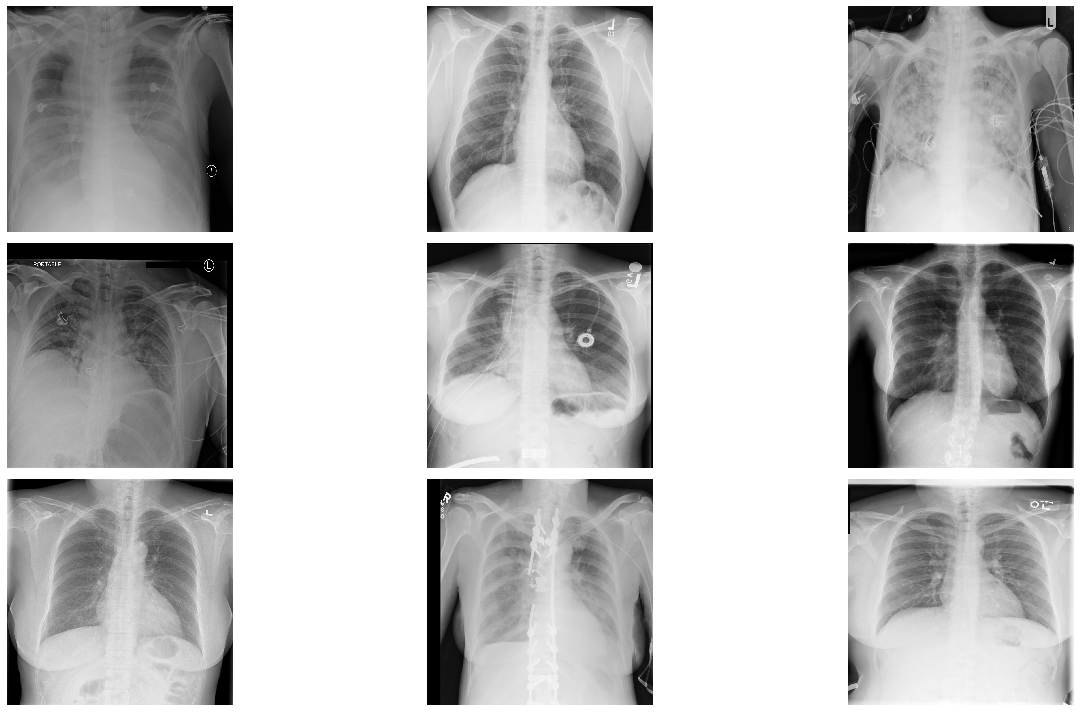

In [10]:
# Extract numpy values from Image column in data frame
images = df_raw['Image'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = 'G:\Chest_dataset\images'   

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
# Adjust subplot parameters to give specified padding
plt.tight_layout()    

The dimensions of the image are 1024 pixels width and 1024 pixels height, one single color channel
The maximum pixel value is 1.0000 and the minimum is 0.0000
The mean value of the pixels is 0.3671 and the standard deviation is 0.1762


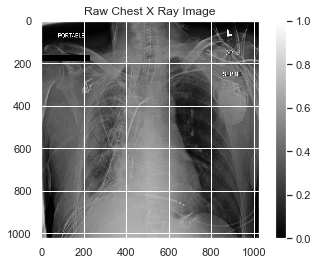

In [11]:
# Get the first image that was listed in the train_df dataframe
sample_img = df_raw['Image'][0]
raw_image = plt.imread(os.path.join(img_dir, sample_img))
plt.imshow(raw_image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {raw_image.shape[0]} pixels width and {raw_image.shape[1]} pixels height, one single color channel")
print(f"The maximum pixel value is {raw_image.max():.4f} and the minimum is {raw_image.min():.4f}")
print(f"The mean value of the pixels is {raw_image.mean():.4f} and the standard deviation is {raw_image.std():.4f}")

Text(0, 0.5, '# Pixels in Image')

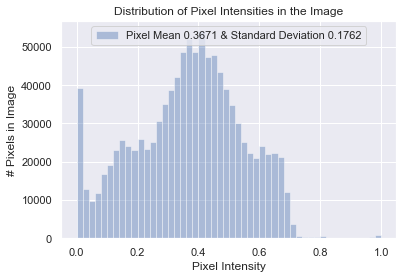

In [12]:
#Plotting an histogram to see distribution of pixels

sns.distplot(raw_image.ravel(), 
             label=f'Pixel Mean {np.mean(raw_image):.4f} & Standard Deviation {np.std(raw_image):.4f}', kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixels in Image')

In [13]:
#Splitting our dataframe to train and test on distinct Patient_ID

import random

prng_seed=42
prng = random.Random()
prng.seed(prng_seed)


test_size=0.2
id_list = df_raw['Patient ID'].unique().tolist()
id_size = len(id_list)
prng.shuffle(id_list)
    
test_abs_size =  int(id_size * test_size)
test_id = id_list[-test_abs_size:]
train_id = id_list[:-test_abs_size]
    
train_data = df_raw[df_raw['Patient ID'].isin(train_id)]    
test_data = df_raw[df_raw['Patient ID'].isin(test_id)]
    
df_train=pd.DataFrame(train_data,columns=df_raw.columns)
df_test=pd.DataFrame(test_data,columns=df_raw.columns)

In [14]:
labels = ['Cardiomegaly', 
          'Emphysema', 
          'Effusion', 
          'Hernia', 
          'Infiltration', 
          'Mass', 
          'Nodule', 
          'Atelectasis',
          'Pneumothorax',
          'Pleural_Thickening', 
          'Pneumonia', 
          'Fibrosis', 
          'Edema', 
          'Consolidation']

In [15]:
#Importing image data generator
from keras.preprocessing.image import ImageDataGenerator

# Normalize images
train_image_generator = ImageDataGenerator(
    samplewise_center=True, #Set each sample mean to 0.
    samplewise_std_normalization= True # Divide each input by its standard deviation
)

# Flow from directory with specified batch size and target image size
train_generator = train_image_generator.flow_from_dataframe(
        dataframe=df_train,
        directory="G:\Chest_dataset\images",
        x_col="Image", # features
        y_col=labels, # labels
        class_mode="raw", # 'Mass' column should be in train_df
        batch_size= 1, # images per batch
        shuffle=False, # shuffle the rows or not
        target_size=(320,320) # width and height of output image
)

Found 4470 validated image filenames.


In [16]:
test_image_generator = ImageDataGenerator(rescale = 1./255)

test_generator = test_image_generator.flow_from_dataframe(
            dataframe=df_test,
            directory="G:\Chest_dataset\images",
            x_col="Image",
            y_col=labels,
            class_mode="raw",
            batch_size=8,
            shuffle=False,
            seed=1,
            target_size=(320,320))

Found 1136 validated image filenames.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 320 pixels width and 320 pixels height
The maximum pixel value is 3.5952 and the minimum is -2.0900
The mean value of the pixels is -0.0000 and the standard deviation is 1.0000


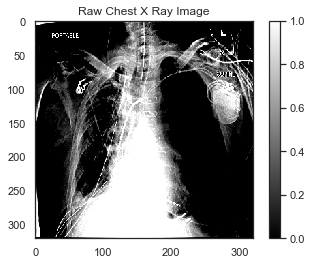

In [17]:
# Plot a processed image
sns.set_style("white")
generated_image, label = train_generator.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

Text(0, 0.5, '# Pixel')

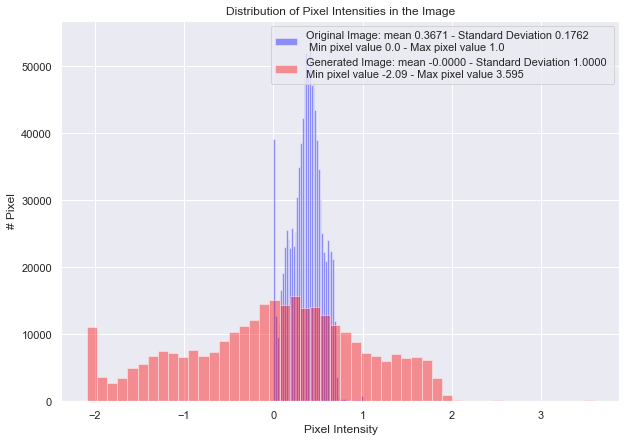

In [18]:
# Include a histogram of the distribution of the pixels
sns.set()
plt.figure(figsize=(10, 7))

# Plot histogram for original iamge
sns.distplot(raw_image.ravel(), 
             label=f'Original Image: mean {np.mean(raw_image):.4f} - Standard Deviation {np.std(raw_image):.4f} \n '
             f'Min pixel value {np.min(raw_image):.4} - Max pixel value {np.max(raw_image):.4}',
             color='blue', 
             kde=False)

# Plot histogram for generated image
sns.distplot(generated_image[0].ravel(), 
             label=f'Generated Image: mean {np.mean(generated_image[0]):.4f} - Standard Deviation {np.std(generated_image[0]):.4f} \n'
             f'Min pixel value {np.min(generated_image[0]):.4} - Max pixel value {np.max(generated_image[0]):.4}', 
             color='red', 
             kde=False)

# Place legends
plt.legend()
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('# Pixel')

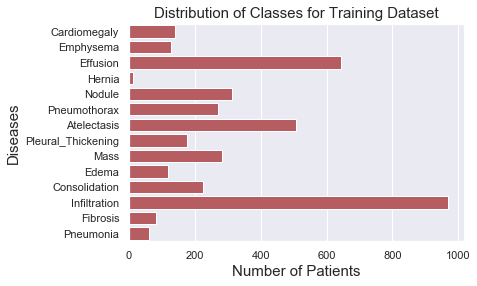

In [19]:
# Count up the number of instances of each class (drop non-class columns from the counts)
class_counts = df_raw__2.sum()

# Plot up the distribution of counts
sns.barplot(class_counts.values, class_counts.index, color='r')
plt.title('Distribution of Classes for Training Dataset', fontsize=15)
plt.xlabel('Number of Patients', fontsize=15)
plt.ylabel('Diseases', fontsize=15)
plt.show()

In [20]:
def compute_class_freqs(labels):
    """
    Compute positive and negative frequences for each class.

    Args:
        labels (np.array): matrix of labels, size (num_examples, num_classes)
    Returns:
        positive_frequencies (np.array): array of positive frequences for each
                                         class, size (num_classes)
        negative_frequencies (np.array): array of negative frequences for each
                                         class, size (num_classes)
    """
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # total number of patients (rows)
    N = labels.shape[0]
    
    positive_frequencies = np.sum(labels, axis=0) / N
    negative_frequencies = 1 - positive_frequencies

    ### END CODE HERE ###
    return positive_frequencies, negative_frequencies

In [21]:
freq_pos, freq_neg = compute_class_freqs(train_generator.labels)
freq_pos

array([0.02550336, 0.02102908, 0.11073826, 0.00201342, 0.17136465,
       0.04899329, 0.05704698, 0.08836689, 0.05033557, 0.02997763,
       0.01118568, 0.01655481, 0.01946309, 0.03982103])

In [22]:
pos_weights = freq_neg
neg_weights = freq_pos
#pos_contribution = freq_pos * pos_weights 
#neg_contribution = freq_neg * neg_weights

In [23]:
def get_weighted_loss(pos_weights, neg_weights, epsilon=1e-7):
    """
    Return weighted loss function given negative weights and positive weights.

    Args:
      pos_weights (np.array): array of positive weights for each class, size (num_classes)
      neg_weights (np.array): array of negative weights for each class, size (num_classes)
    
    Returns:
      weighted_loss (function): weighted loss function
    """
    def weighted_loss(y_true, y_pred):
        """
        Return weighted loss value. 

        Args:
            y_true (Tensor): Tensor of true labels, size is (num_examples, num_classes)
            y_pred (Tensor): Tensor of predicted labels, size is (num_examples, num_classes)
        Returns:
            loss (Tensor): overall scalar loss summed across all classes
        """
        # initialize loss to zero
        loss = 0.0

        for i in range(len(pos_weights)):
            # for each class, add average weighted loss for that class
            loss_pos = -1 * K.mean(pos_weights[i] * y_true[:, i] * K.log(y_pred[:, i] + epsilon))
            loss_neg = -1 * K.mean(neg_weights[i] * (1 - y_true[:, i]) * K.log(1 - y_pred[:, i] + epsilon))
            loss += loss_pos + loss_neg
        
        return loss
    
    return weighted_loss

In [24]:
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

import util

In [25]:
# create the base pre-trained model
base_model = DenseNet121(weights='densenet.hdf5', include_top=False)

x = base_model.output

# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(x)

# and a logistic layer
predictions = Dense(len(labels), activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer='adam', loss=get_weighted_loss(pos_weights, neg_weights))

#we have already trained the model using a GPU in Google colab,We just load the pretrained weights
# history = model.fit_generator(train_generator, 
#                               validation_data=test_generator,
#                               steps_per_epoch=100, 
#                               validation_steps=25, 
#                               epochs = 3)


In [26]:
#Loading pre-trained weights
model.load_weights("pretrained_model.h5")

In [27]:
#Predicting on test_generator
predicted_vals = model.predict(test_generator, steps = len(test_generator))

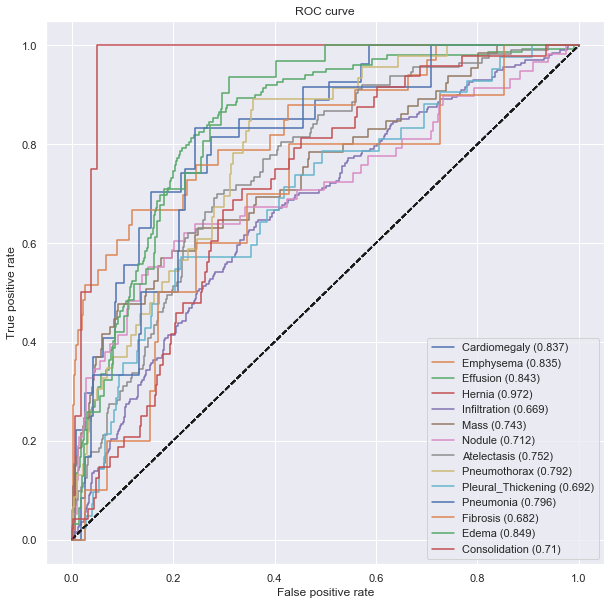

In [28]:
auc_rocs = util.get_roc_curve(labels, predicted_vals, test_generator)

In [29]:
IMAGE_DIR = "G:/Chest_dataset/images/"

def Predict_Disease(Input_Image):
    preprocessed_input = util.load_image(Input_Image, IMAGE_DIR, df_test)
    predictions = model.predict(preprocessed_input)

    plt.figure(figsize=(15, 10))
    plt.subplot(151)
    plt.title("Original")
    plt.axis('off')
    plt.imshow(util.load_image(Input_Image, IMAGE_DIR, df_test, preprocess=False), cmap='gray')

    import operator
    for i in np.reshape(labels,(-1,1)).T.tolist():
        for j in predictions.tolist():
            Result_dict=dict(zip(i,j))
            Final_Result=max(Result_dict.items(),key=operator.itemgetter(1))

    
            print("Probability of Disease",Final_Result[0],"is",Final_Result[1])       

Probability of Disease Atelectasis is 0.7698460817337036


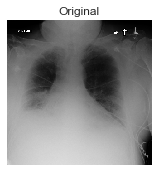

In [38]:
images = df_test['Image'].values
random_image = np.random.choice(images)

Predict_Disease(random_image)